In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("onlineRetail.csv")

In [3]:
dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


In [4]:
dataset.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,12/1/2009 7:45,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,12/1/2009 7:45,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,12/1/2009 7:46,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,12/1/2009 7:46,3.75,13085.0,United Kingdom


In [5]:
from sklearn.cluster import KMeans

In [6]:
from sklearn.metrics import silhouette_score

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [9]:
dataset.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [10]:
dataset[dataset['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,12/1/2009 10:52,0.00,NaN,United Kingdom
283,489463,71477,short,-240,12/1/2009 10:52,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,12/1/2009 10:53,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,12/1/2009 11:44,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,12/1/2009 11:49,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,12/1/2009 11:49,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,12/1/2009 12:32,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,12/1/2009 12:32,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,12/1/2009 12:32,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,12/1/2009 12:32,1.65,NaN,United Kingdom


In [11]:
dataset[dataset['Quantity']<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,12/1/2009 10:33,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,12/1/2009 10:33,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,12/1/2009 10:33,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,12/1/2009 10:33,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,12/1/2009 10:33,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,12/1/2009 10:33,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,12/1/2009 10:33,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,12/1/2009 10:33,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,12/1/2009 10:33,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,12/1/2009 10:44,4.25,17592.0,United Kingdom


In [12]:
dataset['Invoice']=dataset['Invoice'].astype("str")
dataset[dataset['Invoice'].str.match(r"^\d{6}$")==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,12/1/2009 10:33,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,12/1/2009 10:33,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,12/1/2009 10:33,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,12/1/2009 10:33,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,12/1/2009 10:33,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,12/9/2010 15:41,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,12/9/2010 15:43,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,12/9/2010 15:43,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,12/9/2010 15:43,12.75,15329.0,United Kingdom


In [13]:
dataset['Invoice'].str.replace("[0-9]","",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [14]:
dataset[dataset['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,4/29/2010 13:36,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,7/19/2010 11:24,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,10/20/2010 12:04,-38925.87,NaN,United Kingdom


In [15]:
dataset['StockCode']=dataset['StockCode'].astype("str")
dataset[(dataset['StockCode'].str.match("^\\d{5}$")==False)&(dataset['StockCode'].str.match("^\\d{5}[a-zA-Z]+$")==False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [16]:
dataset[dataset['StockCode'].str.contains('^DOT')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,12/1/2009 14:28,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,12/1/2009 14:43,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,12/1/2009 14:44,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,12/1/2009 14:45,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,12/1/2009 14:46,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,12/9/2010 14:09,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,12/9/2010 16:26,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,12/9/2010 16:27,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,12/9/2010 16:31,822.94,NaN,United Kingdom


In [17]:
dataset[dataset['StockCode'].str.contains('^POST')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,12/1/2009 9:28,18.00,12682.0,France
126,489444,POST,POSTAGE,1,12/1/2009 9:55,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,12/1/2009 10:10,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,12/1/2009 11:50,18.00,12533.0,Germany
927,C489538,POST,POSTAGE,-1,12/1/2009 12:18,9.58,15796.0,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,12/9/2010 11:31,18.00,12494.0,France
522930,537995,POST,POSTAGE,2,12/9/2010 11:39,18.00,12712.0,Germany
522974,538003,POST,POSTAGE,8,12/9/2010 12:05,18.00,12429.0,Denmark
523064,538008,POST,POSTAGE,5,12/9/2010 12:17,18.00,12683.0,France


In [18]:
dataset[dataset['StockCode'].str.contains('^gift_0001_80')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
30620,491968,gift_0001_80,NaN,2,12/14/2009 17:56,0.00,NaN,United Kingdom
31079,491969,gift_0001_80,Dotcomgiftshop Gift Voucher £80.00,1,12/14/2009 17:57,69.56,NaN,United Kingdom
56446,C494472,gift_0001_80,Dotcomgiftshop Gift Voucher £80.00,-1,1/14/2010 14:51,69.56,NaN,United Kingdom
298842,518488,gift_0001_80,NaN,10,8/9/2010 12:29,0.00,NaN,United Kingdom


In [19]:
dataset[dataset['StockCode'].str.contains('^DCGSSGIRL')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80231,496722,DCGSSGIRL,NaN,-1,2/3/2010 14:04,0.00,NaN,United Kingdom
241372,512738,DCGSSGIRL,update,100,6/17/2010 14:11,0.00,NaN,United Kingdom
244831,513099,DCGSSGIRL,GIRLS PARTY BAG,3,6/21/2010 15:13,3.36,NaN,United Kingdom
246184,513200,DCGSSGIRL,GIRLS PARTY BAG,6,6/22/2010 16:28,3.36,NaN,United Kingdom
249938,513574,DCGSSGIRL,GIRLS PARTY BAG,1,6/25/2010 15:13,3.36,NaN,United Kingdom
251930,513655,DCGSSGIRL,GIRLS PARTY BAG,5,6/28/2010 10:02,3.36,NaN,United Kingdom
253997,513907,DCGSSGIRL,GIRLS PARTY BAG,1,6/29/2010 12:08,3.36,NaN,United Kingdom
385192,526405,DCGSSGIRL,GIRLS PARTY BAG,6,10/11/2010 13:53,3.36,NaN,United Kingdom
425616,530060,DCGSSGIRL,GIRLS PARTY BAG,2,11/1/2010 11:35,3.36,NaN,United Kingdom
427107,530140,DCGSSGIRL,GIRLS PARTY BAG,12,11/1/2010 16:45,3.36,NaN,United Kingdom


In [20]:
dataset[dataset['StockCode'].str.contains('^PADS')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,1/19/2010 17:04,0.001,16705.0,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,1/29/2010 13:53,0.001,13583.0,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2/1/2010 15:38,0.001,17350.0,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2/3/2010 11:58,0.001,13408.0,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2/15/2010 10:47,0.001,13408.0,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2/21/2010 12:03,0.001,15182.0,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2/24/2010 13:46,0.001,13765.0,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2/26/2010 13:26,0.001,14459.0,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,3/15/2010 11:00,0.001,14857.0,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,4/12/2010 16:30,0.001,12671.0,Germany


# Data Cleaning

In [21]:
df=dataset.copy()

In [22]:
df['Invoice']=df['Invoice'].astype("str")

mask=(
    df['Invoice'].str.match("^\\d{6}$")==True
    )

df=df[mask]

In [23]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


In [24]:
df['StockCode']=df['StockCode'].astype("str")

mask=(
      (df['StockCode'].str.match("^\\d{5}$")==True)
    | (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$")==True)
    | (df['StockCode'].str.match("^PADS$")==True)
)

df=df[mask]

In [25]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


In [26]:
df.describe()

,Quantity,Price,Customer ID
count,512796.000000,512796.000000,406337.000000
mean,11.001279,3.391447,15373.632992
std,104.352433,5.067864,1677.365907
min,-9600.000000,0.000000,12346.000000
25%,1.000000,1.250000,14004.000000
50%,3.000000,2.100000,15326.000000
75%,10.000000,4.210000,16814.000000
max,19152.000000,1157.150000,18287.000000


In [27]:
df.dropna(subset=['Customer ID'],inplace=True)

C:\python 37\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [28]:
df.describe()

,Quantity,Price,Customer ID
count,406337.000000,406337.000000,406337.000000
mean,13.619099,2.991462,15373.632992
std,97.000659,4.285876,1677.365907
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14004.000000
50%,5.000000,1.950000,15326.000000
75%,12.000000,3.750000,16814.000000
max,19152.000000,295.000000,18287.000000


In [29]:
len(df[df['Price']==0])

28

In [30]:
df=df[df['Price']>0]

In [31]:
df.describe()

,Quantity,Price,Customer ID
count,406309.000000,406309.000000,406309.000000
mean,13.617924,2.991668,15373.722268
std,96.998833,4.285951,1677.329470
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,14006.000000
50%,5.000000,1.950000,15326.000000
75%,12.000000,3.750000,16814.000000
max,19152.000000,295.000000,18287.000000


In [32]:
len(df)/len(dataset)

0.7732429238325965

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406309 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      406309 non-null  object 
 1   StockCode    406309 non-null  object 
 2   Description  406309 non-null  object 
 3   Quantity     406309 non-null  int64  
 4   InvoiceDate  406309 non-null  object 
 5   Price        406309 non-null  float64
 6   Customer ID  406309 non-null  float64
 7   Country      406309 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


# Feature Engineering

In [34]:
df['Total Sum']=df['Price']*df['Quantity']

C:\Users\ABHIRA~1\AppData\Local\Temp/ipykernel_18940/2972096620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Sum']=df['Price']*df['Quantity']


In [35]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Sum
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom,7.50


In [75]:
new_df = df.groupby(by="Customer ID", as_index=False).agg(
    MonetaryValue=('Total Sum', 'sum'),
    Frequency=('Invoice', 'nunique'),
    Unique_buys=('StockCode','nunique'),
    LastInvoiceDate=('InvoiceDate', 'max')
)

new_df.head(10)


,Customer ID,MonetaryValue,Frequency,Unique_buys,LastInvoiceDate
0,12346.0,169.36,2,24,6/28/2010 13:53
1,12347.0,1323.32,2,70,12/7/2010 14:57
2,12348.0,221.16,1,19,9/27/2010 14:59
3,12349.0,2221.14,2,89,4/29/2010 13:20
4,12351.0,300.93,1,21,11/29/2010 15:23
5,12352.0,343.80,2,18,11/29/2010 10:07
6,12353.0,317.76,1,20,10/27/2010 12:44
7,12355.0,488.21,1,22,5/21/2010 11:59
8,12356.0,3126.25,3,67,11/24/2010 12:24
9,12357.0,11229.99,1,164,11/16/2010 10:05


In [37]:
new_df

,Customer ID,MonetaryValue,Frequency,Unique_buys,LastInvoiceDate
0,12346.0,169.36,2,24,6/28/2010 13:53
1,12347.0,1323.32,2,70,12/7/2010 14:57
2,12348.0,221.16,1,19,9/27/2010 14:59
3,12349.0,2221.14,2,89,4/29/2010 13:20
4,12351.0,300.93,1,21,11/29/2010 15:23
...,...,...,...,...,...
4280,18283.0,641.77,6,158,8/19/2010 13:04
4281,18284.0,411.68,1,27,10/4/2010 11:33
4282,18285.0,377.00,1,11,2/17/2010 10:24
4283,18286.0,1246.43,2,66,8/20/2010 11:57


In [38]:
len(df['Invoice'].unique())

18966

In [39]:
len(df['StockCode'].unique())

4007

In [40]:
len(df['Customer ID'].unique())

4285

In [41]:
new_df.describe()

,Customer ID,MonetaryValue,Frequency,Unique_buys
count,4285.000000,4285.000000,4285.000000,4285.000000
mean,15356.806768,2024.126801,4.426138,63.909452
std,1699.839258,8813.945538,7.938017,85.765247
min,12346.000000,1.550000,1.000000,1.000000
25%,13891.000000,307.560000,1.000000,17.000000
50%,15362.000000,702.900000,2.000000,38.000000
75%,16840.000000,1704.290000,5.000000,79.000000
max,18287.000000,349164.350000,183.000000,1737.000000


# Customer Segmentation

In [42]:
new_df['LastInvoiceDate'] = pd.to_datetime(new_df['LastInvoiceDate'])
maxi=new_df['LastInvoiceDate'].max()

In [43]:
maxi

Timestamp('2010-12-09 16:08:00')

In [44]:
new_df['Recency']=(maxi-new_df['LastInvoiceDate']).dt.days

In [45]:
new_df.head(10)

,Customer ID,MonetaryValue,Frequency,Unique_buys,LastInvoiceDate,Recency
0,12346.0,169.36,2,24,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,70,2010-12-07 14:57:00,2
2,12348.0,221.16,1,19,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,89,2010-04-29 13:20:00,224
4,12351.0,300.93,1,21,2010-11-29 15:23:00,10
5,12352.0,343.80,2,18,2010-11-29 10:07:00,10
6,12353.0,317.76,1,20,2010-10-27 12:44:00,43
7,12355.0,488.21,1,22,2010-05-21 11:59:00,202
8,12356.0,3126.25,3,67,2010-11-24 12:24:00,15
9,12357.0,11229.99,1,164,2010-11-16 10:05:00,23


In [46]:
new_df.drop(columns='LastInvoiceDate',inplace=True)

In [47]:
new_df.head(10)

,Customer ID,MonetaryValue,Frequency,Unique_buys,Recency
0,12346.0,169.36,2,24,164
1,12347.0,1323.32,2,70,2
2,12348.0,221.16,1,19,73
3,12349.0,2221.14,2,89,224
4,12351.0,300.93,1,21,10
5,12352.0,343.80,2,18,10
6,12353.0,317.76,1,20,43
7,12355.0,488.21,1,22,202
8,12356.0,3126.25,3,67,15
9,12357.0,11229.99,1,164,23


In [48]:
new_df.describe()

,Customer ID,MonetaryValue,Frequency,Unique_buys,Recency
count,4285.000000,4285.000000,4285.000000,4285.000000,4285.000000
mean,15356.806768,2024.126801,4.426138,63.909452,137.666744
std,1699.839258,8813.945538,7.938017,85.765247,90.728927
min,12346.000000,1.550000,1.000000,1.000000,0.000000
25%,13891.000000,307.560000,1.000000,17.000000,74.000000
50%,15362.000000,702.900000,2.000000,38.000000,111.000000
75%,16840.000000,1704.290000,5.000000,79.000000,197.000000
max,18287.000000,349164.350000,183.000000,1737.000000,373.000000


In [49]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4285 entries, 0 to 4284
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    4285 non-null   float64
 1   MonetaryValue  4285 non-null   float64
 2   Frequency      4285 non-null   int64  
 3   Unique_buys    4285 non-null   int64  
 4   Recency        4285 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 167.5 KB


In [50]:
from sklearn.preprocessing import StandardScaler


features = ['MonetaryValue', 'Frequency', 'Unique_buys', 'Recency']


scaler = StandardScaler()
data = scaler.fit_transform(new_df[features])

In [51]:
data

array([[-0.21046003, -0.30567092, -0.46538791,  0.29027489],
       [-0.07952041, -0.30567092,  0.07102246, -1.49547209],
       [-0.2045823 , -0.43166167, -0.52369339, -0.7128299 ],
       ...,
       [-0.18689916, -0.43166167, -0.61698215,  1.73430485],
       [-0.08824511, -0.30567092,  0.02437808, -0.29395098],
       [ 0.03081649, -0.05368941,  0.14098904, -0.64669112]])

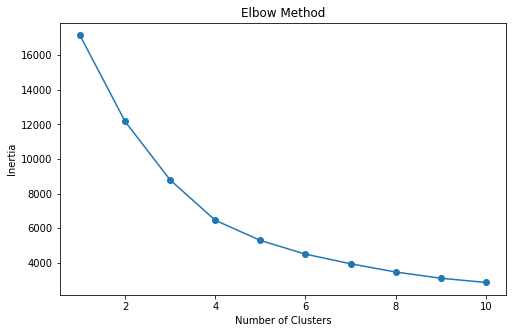

In [52]:
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [53]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data)

new_df['Cluster'] = clusters


In [54]:
new_df

,Customer ID,MonetaryValue,Frequency,Unique_buys,Recency,Cluster
0,12346.0,169.36,2,24,164,0
1,12347.0,1323.32,2,70,2,0
2,12348.0,221.16,1,19,73,0
3,12349.0,2221.14,2,89,224,1
4,12351.0,300.93,1,21,10,0
...,...,...,...,...,...,...
4280,18283.0,641.77,6,158,112,2
4281,18284.0,411.68,1,27,66,0
4282,18285.0,377.00,1,11,295,1
4283,18286.0,1246.43,2,66,111,0


In [55]:
cluster_summary = new_df.groupby('Cluster')[features].mean()
cluster_summary

,MonetaryValue,Frequency,Unique_buys,Recency
Cluster,,,,
0,1134.395060,3.207358,44.755853,82.245819
1,748.358224,2.174981,36.151899,250.644825
2,6659.849844,13.107807,201.979554,103.074349
3,114322.170833,110.083333,798.250000,91.666667


Cluster 0
MonetaryValue: 1,134.40
Frequency: 3.21
Unique_buys: 44.76
Recency: 82.25


These customers spend a moderate amount compared to others, and they buy from a moderately broad range of products (about 45 unique items on average).
Their frequency is somewhat low (just over 3 purchases on average), suggesting they do not buy extremely often—but more frequently than the lowest-spending cluster (Cluster 1).
Their recency is around 82 days, so they have purchased relatively recently (less time since last purchase) compared to Cluster 1 and somewhat close to the top clusters’ recency.


They could be encouraged to move up in spend and frequency via targeted promotions or cross-selling.
Because their recency is fairly good, you might capitalize on that interest/awareness to increase engagement further.

Cluster 1
MonetaryValue: 748.36
Frequency: 2.17
Unique_buys: 36.15
Recency: 250.64


This is the lowest-spending cluster. They buy less frequently (about 2 times on average) and purchase fewer unique products.
They also have the highest recency value (251 days), implying it’s been a long time since their last purchase. They could be slipping away or becoming inactive.


Consider a reactivation (e.g., special promotions, reminder emails, or personalized offers to re-engage them).
Focus on encouraging them to make a new purchase to reduce their recency, and possibly try new products to increase variety.

Cluster 2
MonetaryValue: 6,659.85
Frequency: 13.11
Unique_buys: 201.98
Recency: 103.07


These are high spenders and fairly frequent purchasers. They explore a large variety of products (over 200 unique items on average).
Their recency is around 103 days—so they have not purchased super recently compared to Clusters 0 and 3, but they are still active enough to show a high purchase frequency overall.


Since they’re likely valuable, consider loyalty programs and tiered rewards to keep them engaged.
Personalized recommendations could encourage them to come back sooner and increase loyalty, especially since they show an interest in a wide range of products.

Cluster 3
MonetaryValue: 114,322.17
Frequency: 110.08
Unique_buys: 798.25
Recency: 91.67


These customers are the top-tier  segment. They spend significantly more than any other cluster, purchase extremely frequently, and buy an exceptionally wide range of products.
Their recency is around 92 days, indicating that although they haven’t purchased in the last couple of months, on average, they are still more active than many other segments (except for those with lower recency like Cluster 0).


As your most valuable customers, it is crucial to keep them highly engaged. Offer exclusive perks, early access to new products, or invitations to special events.
These customers can also be great advocates if approached with loyalty/referral incentives.



Overall Recommendations
Retain and Reward Top Spenders (Clusters 2 & 3)

Create special loyalty incentives, early access, or VIP services.
Personalized offers, targeted marketing campaigns to keep their recency numbers low.
Reactivate Cluster 1

Since they have the highest recency and the lowest spend, a targeted campaign to bring them back (promo codes, free shipping) can help.
Understand why they might have churned; adjust offerings accordingly.
Grow Mid-Level Customers (Cluster 0)

Encourage them to purchase more frequently (e.g., product recommendations, cross-sell/upsell).
Their relatively shorter recency window means they’re still receptive, so timely promotions and product suggestions can boost loyalty and spend.
By tailoring marketing strategies to each cluster, you can optimize engagement and customer lifetime value across different segments of your customer base.


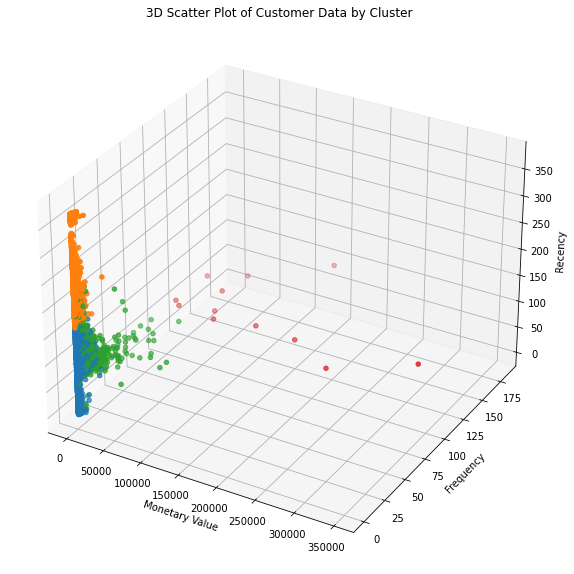

In [56]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = new_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(new_df['MonetaryValue'], 
                     new_df['Frequency'], 
                     new_df['Recency'],
                     c=colors,
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()


In [57]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Sum
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom,30.0
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,12/1/2009 7:45,1.65,13085.0,United Kingdom,39.6
6,489434,21871,SAVE THE PLANET MUG,24,12/1/2009 7:45,1.25,13085.0,United Kingdom,30.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,12/1/2009 7:45,5.95,13085.0,United Kingdom,59.5
8,489435,22350,CAT BOWL,12,12/1/2009 7:46,2.55,13085.0,United Kingdom,30.6
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,12/1/2009 7:46,3.75,13085.0,United Kingdom,45.0


# Product Segmentation

In [58]:
prod_df = df.groupby(by="StockCode", as_index=False).agg(
    Price=('Price','mean'),
    Frequency=('Invoice', 'nunique'),
    Quantity=('Quantity','sum'),
    LastInvoiceDate=('InvoiceDate', 'max')
)

prod_df.head(10)


,StockCode,Price,Frequency,Quantity,LastInvoiceDate
0,10002,0.839813,258,7801,9/9/2010 17:40
1,10080,0.850000,5,12,9/16/2010 19:09
2,10109,0.420000,1,4,12/3/2009 12:31
3,10120,0.210000,36,471,9/17/2010 16:03
4,10123C,0.622340,44,627,9/5/2010 14:40
5,10123G,0.559231,12,2246,9/27/2010 16:30
6,10124A,0.420000,14,46,9/9/2010 19:46
7,10124G,0.420000,6,20,9/9/2010 19:46
8,10125,0.850000,63,790,9/9/2010 19:46
9,10133,0.845568,88,967,9/9/2010 16:11


In [59]:
prod_df['Revenue']=prod_df['Price']*prod_df['Quantity']

In [60]:
prod_df.head(10)

,StockCode,Price,Frequency,Quantity,LastInvoiceDate,Revenue
0,10002,0.839813,258,7801,9/9/2010 17:40,6551.384590
1,10080,0.850000,5,12,9/16/2010 19:09,10.200000
2,10109,0.420000,1,4,12/3/2009 12:31,1.680000
3,10120,0.210000,36,471,9/17/2010 16:03,98.910000
4,10123C,0.622340,44,627,9/5/2010 14:40,390.207447
5,10123G,0.559231,12,2246,9/27/2010 16:30,1256.032308
6,10124A,0.420000,14,46,9/9/2010 19:46,19.320000
7,10124G,0.420000,6,20,9/9/2010 19:46,8.400000
8,10125,0.850000,63,790,9/9/2010 19:46,671.500000
9,10133,0.845568,88,967,9/9/2010 16:11,817.664432


In [61]:
prod_df.drop(columns='LastInvoiceDate',inplace=True)

In [62]:
prod_df.head(10)

,StockCode,Price,Frequency,Quantity,Revenue
0,10002,0.839813,258,7801,6551.384590
1,10080,0.850000,5,12,10.200000
2,10109,0.420000,1,4,1.680000
3,10120,0.210000,36,471,98.910000
4,10123C,0.622340,44,627,390.207447
5,10123G,0.559231,12,2246,1256.032308
6,10124A,0.420000,14,46,19.320000
7,10124G,0.420000,6,20,8.400000
8,10125,0.850000,63,790,671.500000
9,10133,0.845568,88,967,817.664432


In [63]:
prod_df.describe()

,Price,Frequency,Quantity,Revenue
count,4007.000000,4007.000000,4007.000000,4007.000000
mean,3.841979,98.240080,1380.854754,2474.156938
std,9.448821,163.544789,3389.774459,6084.899763
min,0.001000,1.000000,1.000000,0.014000
25%,1.236238,11.000000,62.000000,153.150000
50%,2.091071,38.000000,348.000000,729.116667
75%,4.030000,115.000000,1241.000000,2358.075344
max,295.000000,3021.000000,57570.000000,162531.586061


In [64]:
prod_feat = ['Price', 'Frequency', 'Quantity', 'Revenue']


scaler = StandardScaler()
prod_data = scaler.fit_transform(prod_df[prod_feat])

In [65]:
prod_data

array([[-0.31776874,  0.97697921,  1.89421054,  0.67014029],
       [-0.31669052, -0.57019069, -0.40386923, -0.40498029],
       [-0.36220453, -0.59465188, -0.40622956, -0.40638065],
       ...,
       [-0.27435192, -0.58853658, -0.40681965, -0.40624587],
       [-0.27435192, -0.57630599, -0.40593452, -0.40562952],
       [-0.40655422, -0.51515303, -0.40327914, -0.40665448]])

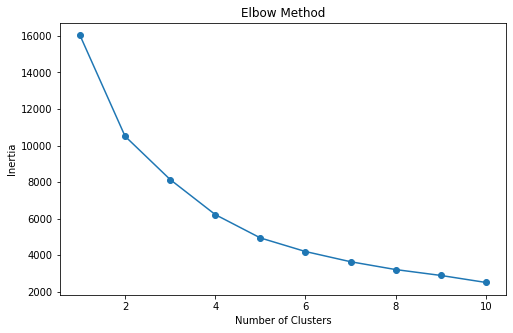

In [66]:
prod_inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(prod_data)
    prod_inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), prod_inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

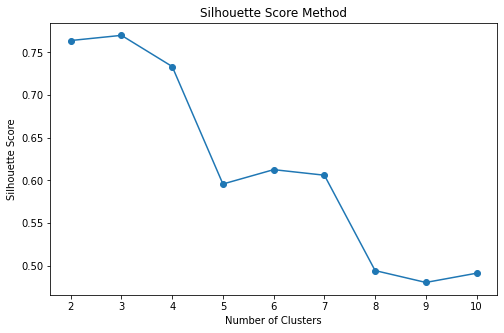

In [67]:
prod_silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(prod_data)
    
    score = silhouette_score(prod_data, kmeans.labels_)
    prod_silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), prod_silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [68]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(prod_data)

prod_df['Cluster'] = clusters

In [69]:
prod_df.head(10)

,StockCode,Price,Frequency,Quantity,Revenue,Cluster
0,10002,0.839813,258,7801,6551.384590,0
1,10080,0.850000,5,12,10.200000,0
2,10109,0.420000,1,4,1.680000,0
3,10120,0.210000,36,471,98.910000,0
4,10123C,0.622340,44,627,390.207447,0
5,10123G,0.559231,12,2246,1256.032308,0
6,10124A,0.420000,14,46,19.320000,0
7,10124G,0.420000,6,20,8.400000,0
8,10125,0.850000,63,790,671.500000,0
9,10133,0.845568,88,967,817.664432,0


In [70]:
prod_df['Cluster'].unique()

array([0, 1, 2])

In [71]:
cluster_summary = prod_df.groupby('Cluster')[prod_feat].mean()
cluster_summary

,Price,Frequency,Quantity,Revenue
Cluster,,,,
0,3.598719,67.501735,800.869762,1458.153046
1,2.641397,555.932806,10008.470356,17523.568799
2,177.447885,9.714286,11.857143,2397.783217


Cluster 0:
Characteristics: Moderate price, low purchase frequency, and medium quantity purchased.
Products in this cluster are likely mid-range items purchased occasionally but in moderate quantities.

Cluster 1:
Characteristics: Low price, very high purchase frequency, and high quantity purchased.
These are likely everyday or high-demand products bought in bulk by frequent buyers.

Cluster 2:
Characteristics: Very high price, very low purchase frequency, and minimal quantity purchased.
These are premium or luxury products with niche demand, contributing significantly to revenue per transaction.